In [1]:
import sys 
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle: ###Particle5
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf): #追加
        ns = noise_rate_pdf.rvs() #順にnn, no, on, oo
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(noised_nu, noised_omega, time, self.pose)

In [3]:
class Mcl: 
    def __init__(self, init_pose, num, motion_noise_stds): 
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time): ###Mcl5###
        for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems): 
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class EstimationAgent(Agent):        ###EstimationAgent5
    def __init__(self, time_interval, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        self.time_interval = time_interval
        
        self.prev_nu = 0.0       #追加
        self.prev_omega = 0.0 #追加
        
    def decision(self, observation=None): #追加
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)

In [5]:
initial_pose = np.array([0, 0, 0]).T   ###mcl5_test（下の出力の先頭数行を記載）
estimator = Mcl(initial_pose, 100, motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})
a = EstimationAgent(0.1, 0.2, 10.0/180*math.pi, estimator)
estimator.motion_update(0.2, 10.0/180*math.pi, 0.1)
for p in estimator.particles:
    print(p.pose)

[0.02185708 0.00017299 0.01582897]
[0.01929824 0.000117   0.01212551]
[0.01751306 0.00019724 0.02252374]
[0.02028605 0.00020654 0.02036173]
[0.022342   0.00021753 0.01947233]
[0.01909021 0.00019834 0.02077832]
[0.01863882 0.00013784 0.01479032]
[0.02051559 0.00025326 0.02468802]
[0.02085873 0.00023011 0.02206315]
[1.69916717e-02 4.78183118e-05 5.62842624e-03]
[1.65255309e-02 3.34844157e-05 4.05244106e-03]
[0.02262367 0.00015421 0.01363232]
[0.02398822 0.00025386 0.02116431]
[0.02131268 0.00020399 0.01914242]
[1.44367566e-02 5.60889119e-05 7.77025359e-03]
[0.02412765 0.00027802 0.02304487]
[0.01759534 0.00018904 0.02148647]
[0.01815757 0.0001516  0.01669842]
[0.02495043 0.00021638 0.01734431]
[2.07950602e-02 8.55547073e-05 8.22832190e-03]
[0.01821402 0.00017607 0.01933249]
[1.98332339e-02 5.31998592e-05 5.36470571e-03]
[0.02355746 0.0002521  0.02140248]
[0.0239373  0.00016617 0.01388395]
[0.01807048 0.00015044 0.01664966]
[1.39853400e-02 9.72242491e-05 1.39035137e-02]
[0.01973084 0.0003

<IPython.core.display.Javascript object>


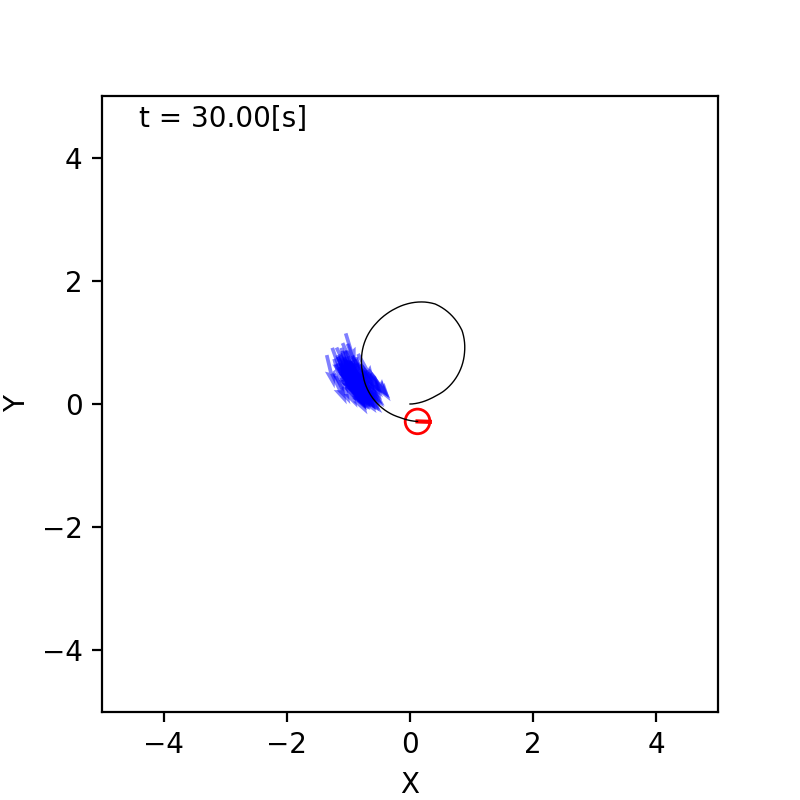

In [6]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(30, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()
    
trial({"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})

In [7]:
#trial({"nn":0.001, "no":0.002, "on":0.003, "oo":0.004})

In [8]:
#trial({"nn":1, "no":2, "on":3, "oo":4})

<IPython.core.display.Javascript object>


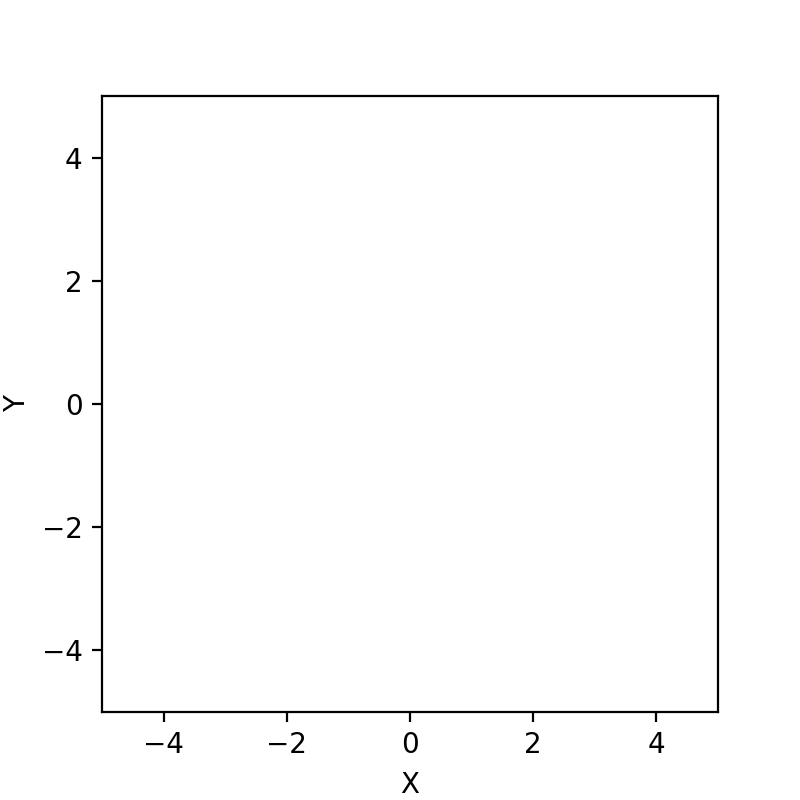

In [9]:
trial({"nn":0.19, "no":0.001, "on":0.13, "oo":0.2})

In [10]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(40, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.1, 0.0, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()

#trial({"nn":0.001, "no":0.001, "on":0.13, "oo":0.001})